##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
**Early Detection of Heart Disease Using Machine Learning**
--------------------------------------------------------------------------------
***Team number:*** 23

---
***Full names of all students in the team:***Nilay Girgaonkar, Avaneesh Kulkarni, Shrey Singhal, Krittika Paul, Harshavardhan Gali

---
***Id number of all students in the team:***2021AAPS0566H,2021A4PS2560H,2021A4PS3097H,2021AAPS628H,2021AAPS0691H


# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

In [ ]:
#Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.mode.chained_assignment = None
from google.colab import drive
drive.mount('/content/drive')
import os

# Set the search parameters
filename = 'Heart_Disease_dataset.csv'
search_path = '/content/drive/MyDrive/'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

import pandas as pd

# Load the csv file into a DataFrame
df = pd.read_csv(file_path)
# View the first few rows of the DataFrame
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Cleveland,63,1,1.1,145,233,1.2,2,150,0,2.3,3,0.1,6,0.2
0,Cleveland,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
1,Cleveland,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,Cleveland,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,Cleveland,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,Cleveland,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [ ]:
df.rename(columns = {'Cleveland':'Hospital','63':'age','1':'sex','1.1':'cp', '145':'trestbps','233':'chol','1.2':'fbs','2':'restecg','150':'thalach','0':'exang','2.3':'oldpeak','3':'slope',
                     '0.1':'ca','6':'thal', '0.2':'num'}, inplace = True)

In [ ]:
#DEFINING DISCRETE AND CONTINUOUS COLUMNS
discr = ['sex','cp','fbs','restecg','exang']
cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data=df.to_numpy()
m,n=data.shape
print(m,n)
print("Number of missing values in each column:")
for i in range(n):
  data_missing=0
  for j in range(m):
    if(data[j][i]=='?'):
      data_missing+=1
  print(df.columns[i],': ', data_missing)




919 15
Number of missing values in each column:
Hospital :  0
age :  0
sex :  0
cp :  0
trestbps :  59
chol :  30
fbs :  90
restecg :  2
thalach :  55
exang :  55
oldpeak :  62
slope :  309
ca :  611
thal :  486
num :  0


We can see that the columns slope, ca and thal have a lot of missing values. We can remove these columns and not actually use them. For the rest of the missing values, we can just remove those specific entries from our dataset. Morever the Hospital should not matter when we are trying to create a model to predict the diagnosis.

In [ ]:
m,n=df.shape
print("Shape before dropping columns: ",m,n)
df.drop(['slope','ca','thal','Hospital'], axis=1,inplace=True)
m,n=df.shape
print("Shape after dropping columns: ",m,n)
copy=df.to_numpy()
for i in range(m):
  flag=0
  for j in range(n):
    if(copy[i][j]=='?'):
      flag+=1
  if(flag!=0):
    df.drop(i, axis=0, inplace=True)
m,n=df.shape
print("Shape after removing rows with missing entries: ",m,n)

Shape before dropping columns:  919 15
Shape after dropping columns:  919 11
Shape after removing rows with missing entries:  739 11


### ***_REMOVING OUTLIERS_***





In [ ]:
m,n=df.shape
for col in df.columns:
        print('Working on column: {}'.format(col))
        df[col] = pd.to_numeric(df[col], errors='coerce')
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(3*sd))]
        df = df[(df[col] >= mean-(3*sd))]
print("Shape after removing Outlier: ",df.shape)

Working on column: age
Working on column: sex
Working on column: cp
Working on column: trestbps
Working on column: chol
Working on column: fbs
Working on column: restecg
Working on column: thalach
Working on column: exang
Working on column: oldpeak
Working on column: num
Shape after removing Outlier:  (721, 11)


In [ ]:
#Splitting data into features and target values and shuffling
m,n=df.shape
df = df.sample(frac = 1, random_state=0)#shuffling
df_nb = df.copy(deep = True)
X_complete = df.iloc[:,0:n-1]
Y_complete = df.iloc[:,n-1:]

### ***_CORRELATION MATRIX_***

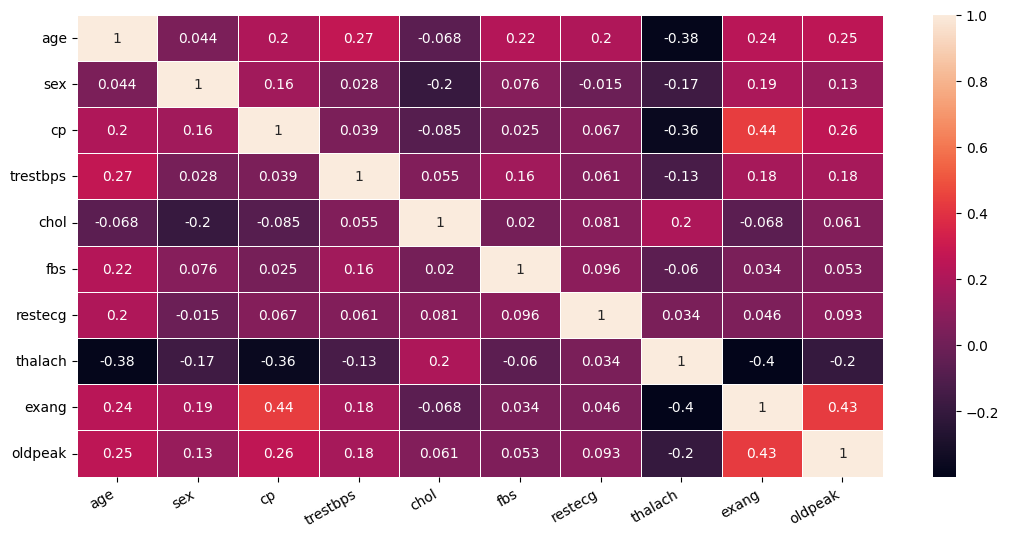

In [ ]:
#PLOTTING THE CORRELATION MATRIX

corrmat = X_complete.corr()

plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax = 1, annot = True, linewidths = .5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

### ***_BOXPLOT_***

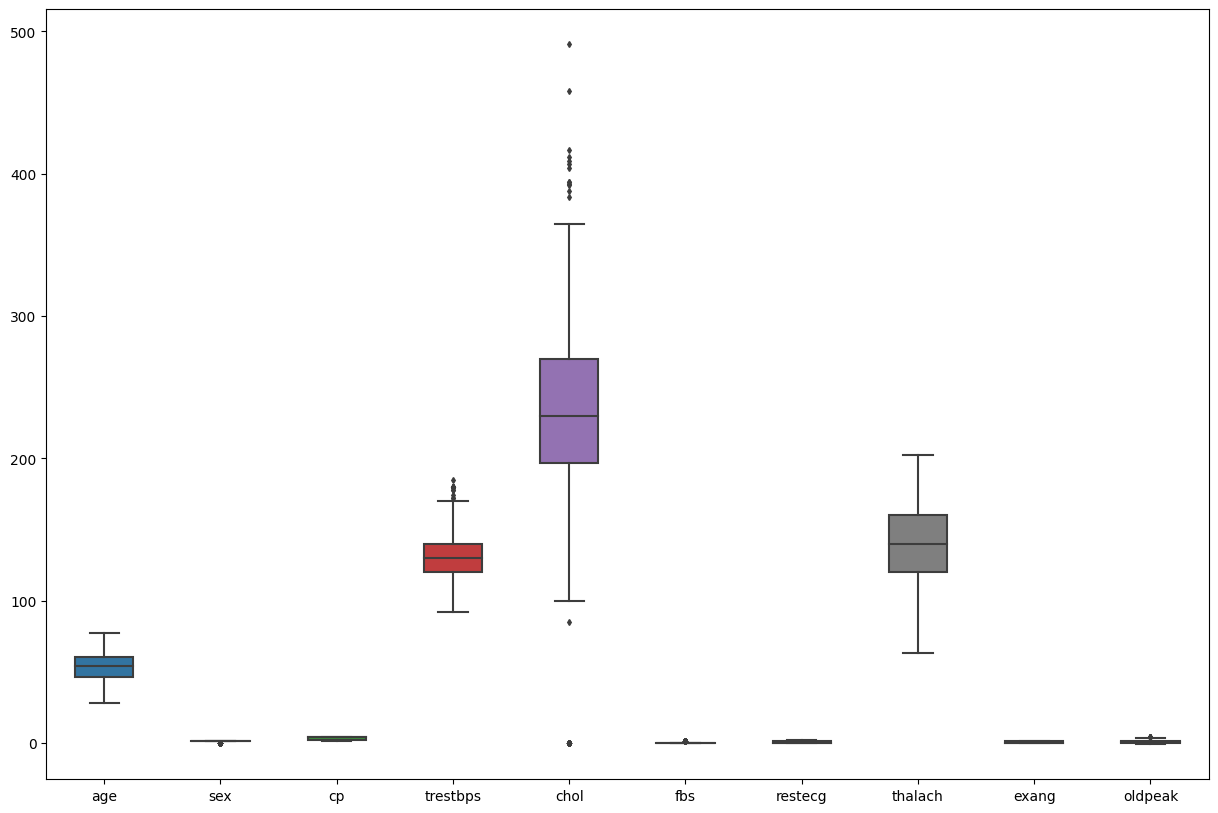

In [ ]:
#PLOTTING THE BOXPLOT FOR THE DATA

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X_complete, width= 0.5,ax=ax,  fliersize=3)
plt.show()

### ***_PLOTTING HISTOGRAMS FOR EACH FEATURE_***

(721, 10)


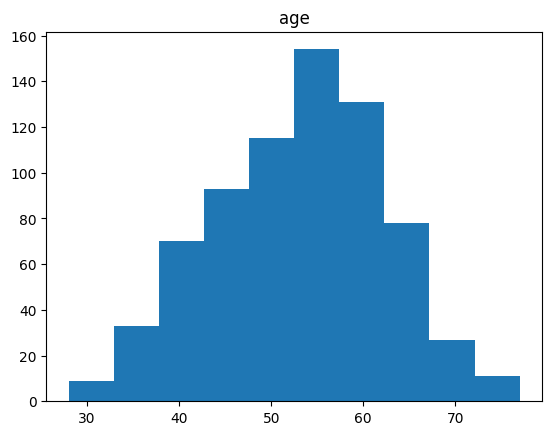

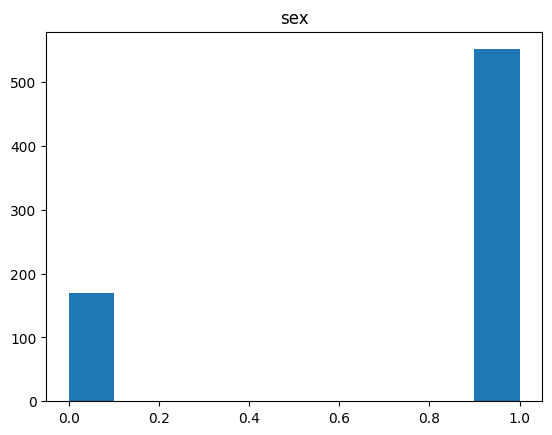

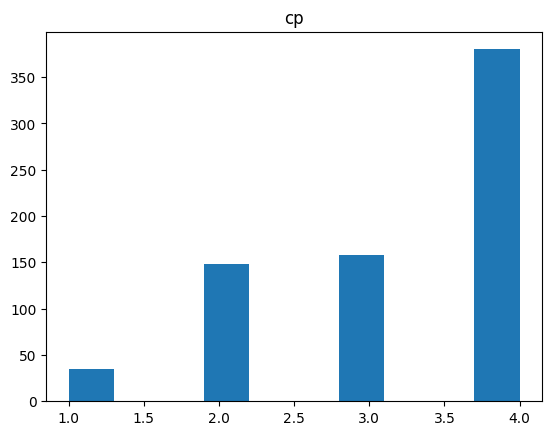

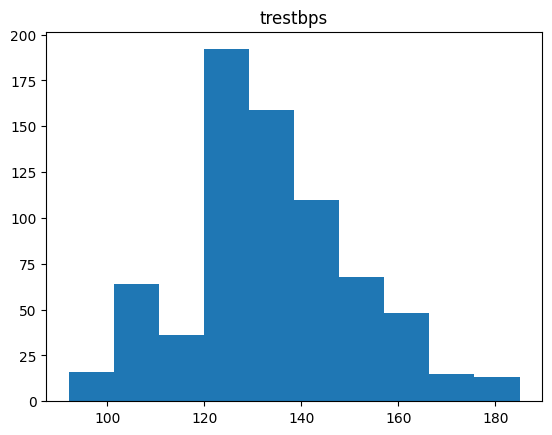

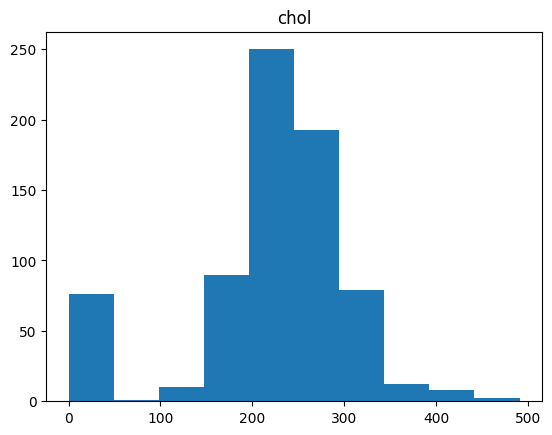

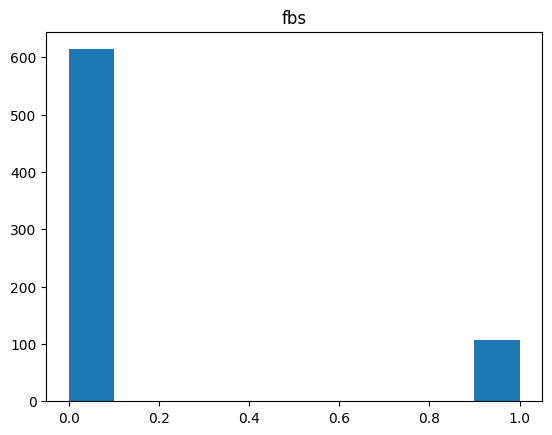

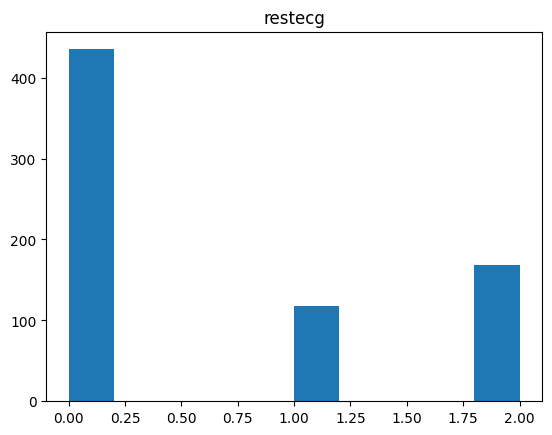

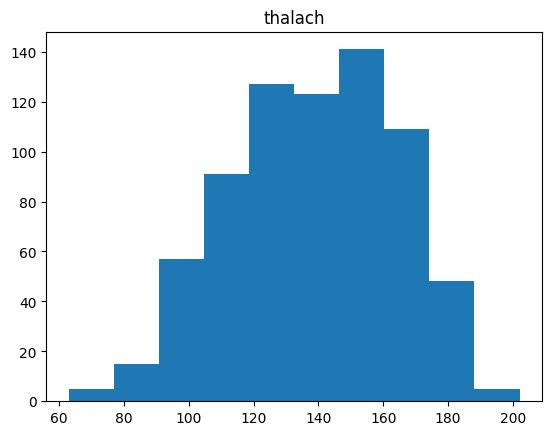

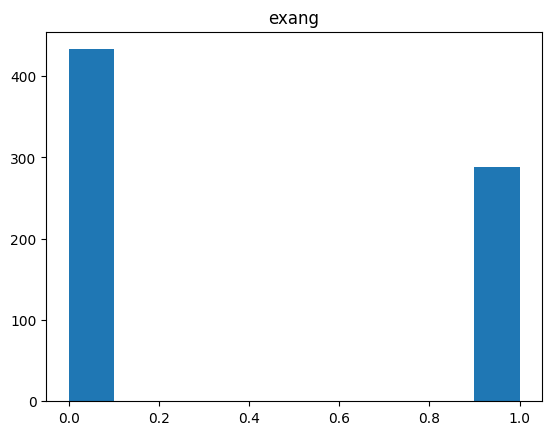

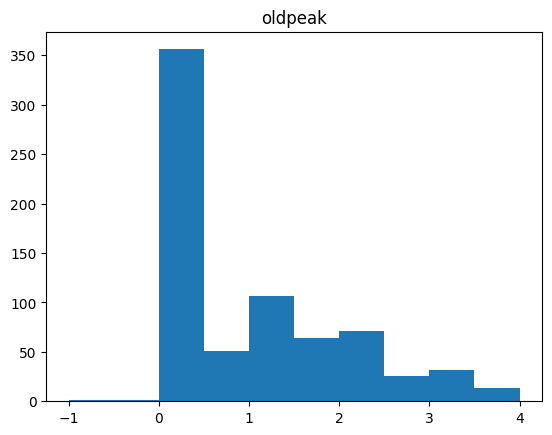

In [ ]:
m,n=X_complete.shape
print(X_complete.shape)

for i in range(n):
    dummy=X_complete.iloc[:,i:i+1]
    dummy=dummy.to_numpy()
    plt.title(X_complete.columns[i])
    plt.hist(dummy)
    plt.show()

## **Binning**
####Binning is a data preprocessing technique that involves grouping continuous data into intervals, or bins. The purpose of binning is to simplify complex datasets by categorizing numerical values into discrete ranges.

In [ ]:
def binning(df):
  df= df.astype(float)
  bins_dict = {}
  for col in cont:
      df[col],bins = pd.cut(df[col], bins = 4, labels = [1,2,3,4], retbins = True)
      bins_dict[col] = bins
  return df

In [ ]:
#Storing the dataframes with a different name
X_comp=X_complete
Y_comp=Y_complete

## ***Splitting Dataset into Test and Training Sets***

In [ ]:
#Converting dataframes to numpy arrays
X_complete=X_comp.to_numpy()
Y_complete=Y_comp.to_numpy()
M,n = X_complete.shape
#Splitting into training and test data
train_rate=0.7
m=math.floor(M*train_rate)
df=X_comp
df_train = df.iloc[:m, :]
X_train_df = df_train
X_train_df=binning(X_train_df)
X_train=X_train_df.to_numpy()
Y_train=Y_complete[:m,:]
m=M-m
df_test =df.iloc[-m:, :]
X_test_df=binning(df_test)
X_test=X_test_df.to_numpy()
Y_test=Y_complete[-m:, :]
X_test = X_test.astype('float128')
X_train=X_train.astype('float128')
# Converting the Target columns to binary values
m,n=Y_train.shape
for i in range(m):
    if(Y_train[i]>=1):
      Y_train[i]=1
m,n=Y_test.shape
for i in range(m):
    if(Y_test[i]>=1):
      Y_test[i]=1

###Splitting Dataset Specifically for Naive Bayes

In [ ]:
df_nb.reset_index(drop = True, inplace = True)

M = 578
discr = ['sex','cp','fbs','restecg','exang']
cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
m,n = df_nb.shape
df_train_nb = df_nb.iloc[:M, :]
for col in cont:
 df_train_nb[col],bins = pd.cut(df_train_nb[col], bins = 4, labels = [1,2,3,4], retbins = True)
X_train_nb = df_train_nb.iloc[:,0:n-1]
Y_train_nb = df_train_nb.iloc[:, n-1:]

df_test_nb = df_nb.iloc[M:, :]
for col in cont:
 df_test_nb[col],bins = pd.cut(df_test_nb[col], bins = 4, labels = [1,2,3,4], retbins = True)
X_test_nb = df_test_nb.iloc[:,0:n-1]
Y_test_nb = df_test_nb.iloc[:, n-1:]

# ***2. ML Model 1***

## Fisher's Discriminant Analysis

Fisher's discriminant analysis, also known as Linear Discriminant Analysis (LDA), is a method used for dimensionality reduction and classification. The goal of LDA is to find the linear combinations of features that best separate two or more classes.

Given a set of observations `x` belonging to different classes `C_k`, where `k` ranges from 1 to `K`, the Fisher's criterion aims to maximize the ratio of the between-class variance to the within-class variance.

The Fisher's criterion for a two-class problem is given by:

$
 J(w) = \frac{w^T \mathbf{S}_B w}{w^T \mathbf{S}_W w}
$
Here,
- `w` is the weight vector that defines the linear combination.
- $(\mathbf{S}_B)$ is the between-class scatter matrix.
- $(\mathbf{S}_W)$ is the within-class scatter matrix.

The within-class scatter matrix $(\mathbf{S}_W)$ is calculated as the sum of the covariance matrices for each class:

$
\mathbf{S}_W = \sum_{{k=1}}^{{K}} \sum_{{i=1}}^{{N_k}} (x_{{ki}} - \mathbf{m}_k)(x_{{ki}} - \mathbf{m}_k)^T
$

where `N_k` is the number of observations in class `C_k`, \(x_{{ki}}\) is an observation in class `C_k`, and $(\mathbf{m}_k)$ is the mean vector for class `C_k`.

The between-class scatter matrix $(\mathbf{S}_B)$ is calculated as:

$
 \mathbf{S}_B = \sum_{{k=1}}^{{K}} N_k (\mathbf{m}_k - \mathbf{m})(\mathbf{m}_k - \mathbf{m})^T
$

where $\mathbf{m}$ is the overall mean vector.

## Optimal Weight Vector

The optimal weight vector $w$ in terms of the within-class scatter matrix $ ( \mathbf{S}_W^{-1} )$ and the difference between class means $ (\mathbf{m}_2 - \mathbf{m}_1)  $can be expressed as:

$
 w \propto \mathbf{S}_W^{-1} (\mathbf{m}_2 - \mathbf{m}_1)
$





In [ ]:
#First lets split the training set into two different sets, one where num=0, and the other where num!=0
m,n=X_train.shape
mask_0 = (Y_train[:, 0] == 0)
X_trai=np.copy(X_train)
X_train_class1 = X_trai[mask_0]
X_train_class2 = X_trai[~mask_0]

In [ ]:
#Now lets find the means of the corresponding clases
m,n=X_train.shape
M1=X_train_class1.mean(axis=0)
M2=X_train_class2.mean(axis=0)
M1 = np.array(M1).reshape((-1, 1))
M2 = np.array(M2).reshape((-1, 1))
M1=np.float128(M1)
M2=np.float128(M2)
print("M1: ")
print(M1)
print("M2: ")
print(M2)

M1: 
[[2.35772358]
 [0.63821138]
 [2.78455285]
 [2.13821138]
 [2.78455285]
 [0.09349593]
 [0.51219512]
 [3.1097561 ]
 [0.13821138]
 [1.42682927]]
M2: 
[[2.74806202]
 [0.8875969 ]
 [3.60852713]
 [2.37596899]
 [2.62015504]
 [0.15891473]
 [0.65891473]
 [2.39147287]
 [0.62403101]
 [2.18217054]]


In [ ]:
#Now lets find the Sw which is the within class covariance matrix
m,n=X_train_class1.shape
Sw=np.zeros((n,n))
Sw=Sw.astype('float64')
for i in range(m):
    xi = np.copy(X_train_class1[i])
    xi=np.array(xi).reshape((-1, 1))
    temp = xi - M1
    temp = np.copy(temp.T)  # Assign the transposed array back to temp
    Sw += np.matmul((xi - M1), temp)

m, n = X_train_class2.shape
for i in range(m):
    xi = np.copy(X_train_class2[i])
    xi = np.array(xi).reshape((-1, 1))
    temp = xi - M2
    temp = np.copy(temp.T)  # Assign the transposed array back to temp
    Sw += np.matmul((xi - M2), temp)
print("Sw: ")
print(Sw)

Sw: 
[[ 3.17144356e+02 -1.14688032e+01  8.51361316e+00  5.92753829e+01
  -1.73057289e+00  2.31018151e+01  7.87562866e+01 -9.42128002e+01
   2.63994139e+01  4.52801097e+01]
 [-1.14688032e+01  8.25411231e+01  1.14724901e+01 -1.79608622e+00
  -1.41903006e+01 -7.03346568e-02 -2.30610701e+00  1.12100586e+00
   4.39771223e+00  5.27075061e+00]
 [ 8.51361316e+00  1.14724901e+01  3.43042541e+02 -2.87019285e+01
   2.16959728e-01 -5.99432785e+00  6.69672906e+00 -4.66441671e+01
   5.53523350e+01  3.60211760e+01]
 [ 5.92753829e+01 -1.79608622e+00 -2.87019285e+01  2.69831821e+02
   2.01701645e+01  1.24064095e+01  4.67063717e+00 -9.70457553e+00
   1.57698053e+01  4.18172622e+01]
 [-1.73057289e+00 -1.41903006e+01  2.16959728e-01  2.01701645e+01
   2.98356495e+02  2.52892796e+00  1.87199849e+01  3.11814143e+01
   7.48024201e+00  4.14746644e+01]
 [ 2.31018151e+01 -7.03346568e-02 -5.99432785e+00  1.24064095e+01
   2.52892796e+00  5.53340896e+01  1.72040083e+01  4.25222159e-01
  -7.64133106e-01 -2.2860654

In [ ]:
#Now lets find w
temp=np.linalg.inv(Sw)
w=np.matmul(temp,(M1-M2))
print("w: ")
print(w)

w: 
[[-0.00019083]
 [-0.00251814]
 [-0.00160135]
 [-0.00058884]
 [ 0.00062835]
 [-0.00118713]
 [-0.0003041 ]
 [ 0.0012805 ]
 [-0.00283785]
 [-0.00137238]]


In [ ]:
#Now lets find the threshold
def find_threshold(X_test,w):
  m,n=X_test.shape
  set1=np.zeros((m,1))
  set2=np.zeros((m,1))
  complete=np.zeros((m,1))
  for i in range(m):
      temp=w.T
      xi=np.copy(X_train[i])
      xi=np.array(xi).reshape((-1, 1))
      temp=np.matmul(temp,xi)
      if(Y_train[i]==1):
        set1[i]=temp
      else:
        set2[i]=temp
      complete[i]=temp
  max_correct=0
  threshold=0
  for i in range(m):
      set1_right = 0
      set1_left = 0
      set2_right = 0
      set2_left = 0
      correct = 0
      for j in range(m):
          if set1[j] != 0:
              if set1[j] >= complete[i]:
                  set1_right += 1
              else:
                  set1_left += 1
          else:
              if set2[j] >= complete[i]:
                  set2_right += 1
              else:
                  set2_left += 1

      # Check if the denominator is zero before performing division
      if (set2_left + set1_left) != 0:
          correct += set1_left / (set2_left + set1_left)

      if (set1_right + set2_right) != 0:
          correct=correct*( set2_right / (set1_right + set2_right))

      if correct > max_correct:
          threshold = complete[i]
          max_correct=correct
  return threshold



In [ ]:
m,n=X_train.shape
true_positive=0
false_positive=0
true_negative=0
false_negative=0
result=np.zeros((m,1))
wrong=0
threshold=find_threshold(X_train,w)
print("Threshold: ", threshold)
for i in range(m):
    temp=w.T
    xi=np.copy(X_train[i])
    xi=np.array(xi).reshape((-1, 1))
    temp=np.matmul(temp,xi)
    if(temp<=threshold):
      if(Y_train[i]==1):
        true_positive+=1
      else:
        false_positive+=1
    else:
      if(Y_train[i]==0):
        true_negative+=1
      else:
        false_negative+=1
print("True positive: ", true_positive)
print("False positive: ",false_positive)
print("True negative: ",true_negative)
print("False negative: ",false_negative)
print("Accuracy on Training set: ",((true_positive+true_negative)/m)*100, "%")

Threshold:  [-0.00612873]
True positive:  226
False positive:  70
True negative:  176
False negative:  32
Accuracy on Training set:  79.76190476190477 %


In [ ]:
#Now lets test the accuracy on the testset
m,n=X_test.shape
true_positive=0
false_positive=0
true_negative=0
false_negative=0
wrong=0
for i in range(m):
    temp=w.T
    xi=np.copy(X_test[i])
    xi=np.array(xi).reshape((-1, 1))
    temp=np.matmul(temp,xi)
    if(temp>threshold):
      if(Y_test[i]==0):
        true_positive+=1
      else:
        false_positive+=1
    else:
      if(Y_test[i]!=0):
        true_negative+=1
      else:
        false_negative+=1
print("True positive: ", true_positive)
print("False positive: ",false_positive)
print("True negative: ",true_negative)
print("False negative: ",false_negative)
print("Accuracy on Testing set: ",((true_positive+true_negative)/m)*100, "%")


True positive:  70
False positive:  10
True negative:  100
False negative:  37
Accuracy on Testing set:  78.3410138248848 %


# ***3. ML Model 2***



## Perceptron

The perceptron is a simple algorithm for binary classification. It takes a set of input features and produces a binary output based on a set of weights and a threshold.

The perceptron's output, $ y $, is calculated as follows:

$
 y = \text{sign}\left(w_0 + w_1\phi(x_1) + w_2\phi(x_2) + \ldots + w_n\phi(x_n)\right)
$
Here,
- $ w_0 $ is the bias term,
- $ w_1, w_2, \ldots, w_n $ are the weights associated with transformed input features $ \phi(x_1), \phi(x_2), \ldots, \phi(x_n) $,
- $ \phi(\cdot) $ is a non-linear transformation function,
- $ \text{sign}(\cdot) $ is the sign function that outputs +1 if the argument is positive, 0 if it's zero, and -1 if it's negative.

The perceptron learning algorithm involves adjusting the weights based on misclassifications. For a misclassified point $ (x, y) $, the weight update is given by:

$
 w_i = w_i + \alpha \cdot (y_{\text{true}} - y_{\text{pred}}) \cdot \phi(x_i)
$
Here,
- $ \alpha $ is the learning rate,
- $ y_{\text{true}} $ is the true label,
- $ y_{\text{pred}} $ is the predicted label,
- $ \phi(x_i) $ is the transformed input feature associated with weight $ w_i $.

The perceptron learning algorithm iteratively updates the weights until convergence or a predefined number of iterations.




In [ ]:
def create_polynomial_features(X, degree):
    m, n = X.shape
    X_poly = np.ones((m, 1))
    for d in range(1, degree + 1):
        for i in range(n):
            X_poly = np.column_stack((X_poly, X[:, i]**d))

    return X_poly


In [ ]:
#First we need to perform non-linear transformation and then add a column of ones to the initial feature matrix
m,n=X_train.shape
print("Numnber of features before polynomial tranformation: ",n)
X_perceptron_train=create_polynomial_features(X_train,2)
m,n=X_perceptron_train.shape
print("Number of features after polynomial tranformation: ",n)
m,n=X_test.shape
X_perceptron_test=create_polynomial_features(X_test,2)
m,n=X_perceptron_test.shape


Numnber of features before polynomial tranformation:  10
Number of features after polynomial tranformation:  21


In [ ]:
#Now we need to change the target matrix where 0 belongs to class 1 and the rest belong to class 2, 1 depicts class 1 where -1 depicts class 2
m,n=Y_train.shape
Y_perceptron_train=np.copy(Y_train)
for i in range(m):
    if(Y_perceptron_train[i]==0):
      Y_perceptron_train[i]=1
    else:
      Y_perceptron_train[i]=-1
Y_perceptron_test=np.copy(Y_test)
m,n=Y_test.shape
for i in range(m):
    temp=Y_perceptron_test[i]
    if(Y_perceptron_test[i]==0):
        Y_perceptron_test[i]=1
    else:
        Y_perceptron_test[i]=-1

In [ ]:
def sign(X,w):#sign function
    c=np.copy(w)
    c=c.T
    temp=np.dot(c,X)
    temp.shape
    if(temp>=0):
      return 1
    else:
      return -1

In [ ]:
def perceptron(X,Y,w,a,iters):
    temp=iters/100
    loss_array=[]
    iter_array=[]
    for i in range(iters):
        loss=0
        for j in range(m):
          xi=np.array(X[j]).reshape((-1, 1))
          w=w+a*(Y[j]-sign(xi,w))*xi
          loss+=(Y[j]-sign(xi,w))**2
        if(i%temp==0):
          loss_array.append(loss)
          iter_array.append(i)
    loss_array.append(loss)
    iter_array.append(iters)
    return w,loss_array,iter_array


In [ ]:
#Now to train our perceptron model
m,n=X_perceptron_train.shape
w=np.ones((n,1))
a=0.0006
iters=1000
w,perceptron_loss,perceptron_iter=perceptron(X_perceptron_train,Y_perceptron_train,w,a,iters)
print("w: ")
print(w)
m,n=X_perceptron_train.shape
true_positive=0
false_positive=0
true_negative=0
false_negative=0
for i in range(m):
    if(sign(X_perceptron_train[i],w)==1):
        if(Y_perceptron_train[i]==1):
            true_positive+=1
        else:
            false_positive+=1
    else:
        if(Y_perceptron_train[i]==-1):
            true_negative+=1
        else:
            false_negative+=1
print("True positive: ", true_positive)
print("False positive: ",false_positive)
print("True negative: ",true_negative)
print("False negative: ",false_negative)
print("Accuracy on Training set: ",((true_positive+true_negative)/m)*100, "%")

w: 
[[-0.5504]
 [ 0.0424]
 [-0.1508]
 [ 0.7996]
 [-0.0068]
 [-0.0692]
 [-0.0608]
 [-0.0656]
 [ 0.0544]
 [-0.0704]
 [ 0.2092]
 [-0.02  ]
 [-0.1508]
 [-0.1916]
 [ 0.0172]
 [ 0.01  ]
 [-0.0608]
 [ 0.016 ]
 [ 0.0088]
 [-0.0704]
 [-0.074 ]]
True positive:  167
False positive:  30
True negative:  228
False negative:  79
Accuracy on Training set:  78.37301587301587 %


In [ ]:
#Testing the model
m,n=X_perceptron_test.shape
true_positive=0
false_positive=0
true_negative=0
false_negative=0
for i in range(m):
    if(sign(X_perceptron_test[i],w)==1):
        if(Y_perceptron_test[i]==1):
            true_positive+=1
        else:
            false_positive+=1
    else:
        if(Y_perceptron_test[i]==-1):
            true_negative+=1
        else:
            false_negative+=1
print("True positive: ", true_positive)
print("False positive: ",false_positive)
print("True negative: ",true_negative)
print("False negative: ",false_negative)
print("Accuracy on Testing set: ",((true_positive+true_negative)/m)*100, "%")

True positive:  70
False positive:  6
True negative:  104
False negative:  37
Accuracy on Testing set:  80.18433179723502 %


# ***4. Naive Bayes Classifier***
The Naive Bayes classifier is a probabilistic machine learning algorithm widely used for classification tasks, especially in natural language processing and spam filtering. Despite its simplicity, it often performs surprisingly well in practice.

## Key Concepts:

### 1. Bayes' Theorem:

Bayes' Theorem is the foundation of the Naive Bayes classifier. It relates the conditional and marginal probabilities of random events.

$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$

Where:
- \( P(A|B) \) is the probability of event A given that event B has occurred.
- \( P(B|A) \) is the probability of event B given that event A has occurred.
- \( P(A) \) and \( P(B) \) are the marginal probabilities of events A and B, respectively.

### 2. Naive Bayes Assumption:

The "naive" assumption in Naive Bayes is that features are conditionally independent given the class label. This simplifying assumption allows the algorithm to model the joint probability of a set of features more efficiently.

$
P(X_1, X_2, \ldots, X_n | Y) = P(X_1 | Y) \cdot P(X_2 | Y) \cdot \ldots \cdot P(X_n | Y)
$

Where:
- \( X_1, X_2, \ldots, X_n \) are the features.
- \( Y \) is the class label.

### 3. Naive Bayes Classification:

Given a set of features \( X = \{X_1, X_2, $\ldots, X_n\$} \), the Naive Bayes classifier predicts the class label \( Y \) that maximizes the posterior probability:

$
P(Y | X) = \frac{P(X | Y) \cdot P(Y)}{P(X)}
$

The class label \( Y \) is chosen as:

$
\hat{Y} = \arg\max_Y P(Y | X)$


###*Note: Here we have binned the continuous feature data, so instead of using a likelihood function to estimate their conditional probability, we will directly calculate the probability normally.*

##4.1 Calculating Class Probabilities
This is done by simply dividing all positive and negative occurences of heart disease respectively by the total number of datapoints in the training set.

In [ ]:
#CALCULATING CLASS PROBABILITIES USING TRAINING SET Y
N_total = len(Y_train_nb)
N_negative = 0
N_positive = 0
for i in range(0, N_total):
    if Y_train_nb.iloc[i]['num'] == 0:
        N_negative+=1
    else:
        N_positive+=1

#CLASS PROBABILITIES
Prob_negative = N_negative/N_total
Prob_positive = N_positive/N_total

print("Probablity of a sample not leading to heart disease: " ,Prob_negative)
print("Probability of a sample leading to heart disease: ", Prob_positive)

Probablity of a sample not leading to heart disease:  0.4844290657439446
Probability of a sample leading to heart disease:  0.5155709342560554


##4.2 Calculating All Conditional Probabilities
Here, we have first split the training set according to 'True' or 'False' outcome. Next, for each respective outcome, we have iterated over each feature in that sub-dataset, and calculated the conditional probability for that feature, appending it to a dictionary for that particular outcome. For continuous features that were binned, we noticed that often certain bin values did not appear at all for a particular outcome. In order to prevent a zero probability from messing up calculations, we simply added a nominal bin count of 1 for that particular feature, which ensures a non-zero albeit very small probability.

In [ ]:
mask_negative = df_train_nb['num'] == 0
mask_positive = df_train_nb['num'] > 0

df_negative = df_train_nb[mask_negative]
df_positive = df_train_nb[mask_positive]

#Creating dictionaries to store
negative = {}
positive = {}
for col in df_negative.columns:
    if col in discr:
        temp_dict = {} #Initialzing a dict like cp : {1: ,2: ,3: ...}
        unique_vals = df_negative[col].unique() #finding unique vals in cp
        col_length = len(df_negative[col]) #length of values in column
        for i in unique_vals: #calculating prob for each unique value
            unique_count = 0
            for elem in df_negative[col]:
                if elem == i:
                    unique_count +=1
            temp_dict[int(i)] = unique_count/col_length
        negative[col] = temp_dict
    elif col in cont:
        temp_dict = {}
        unique_vals = [1,2,3,4]
        col_length = len(df_negative[col])
        for i in unique_vals:
            unique_count = 0
            for elem in df_negative[col]:
                if elem == i:
                    unique_count +=1
            if unique_count == 0:
                unique_count = 1
            temp_dict[int(i)] = unique_count/col_length
        negative[col] = temp_dict

for col in df_positive.columns:
    if col in discr:
        temp_dict = {} #Initialzing a dict like cp : {1: ,2: ,3: ...}
        unique_vals = df_positive[col].unique() #finding unique vals in cp
        col_length = len(df_positive[col]) #length of values in column
        for i in unique_vals: #calculating prob for each unique value
            unique_count = 0
            for elem in df_positive[col]:
                if elem == i:
                    unique_count +=1
            temp_dict[int(i)] = unique_count/col_length
        positive[col] = temp_dict
    elif col in cont:
        temp_dict = {}
        unique_vals = [1,2,3,4]
        col_length = len(df_positive[col])
        for i in unique_vals:
            unique_count = 0
            for elem in df_positive[col]:
                if elem == i:
                    unique_count +=1
            if unique_count == 0:
                unique_count = 1
            temp_dict[int(i)] = unique_count/col_length
        positive[col] = temp_dict

print("Negative outcome posterior probabilities: " , negative)
print("Positive outcome posteriour probabilities: ", positive)

Negative outcome posterior probabilities:  {'age': {1: 0.14285714285714285, 2: 0.43214285714285716, 3: 0.35714285714285715, 4: 0.06785714285714285}, 'sex': {0: 0.37857142857142856, 1: 0.6214285714285714}, 'cp': {3: 0.33214285714285713, 2: 0.37142857142857144, 4: 0.24642857142857144, 1: 0.05}, 'trestbps': {1: 0.175, 2: 0.5392857142857143, 3: 0.26785714285714285, 4: 0.017857142857142856}, 'chol': {1: 0.03214285714285714, 2: 0.2357142857142857, 3: 0.6392857142857142, 4: 0.09285714285714286}, 'fbs': {0: 0.9035714285714286, 1: 0.09642857142857143}, 'restecg': {2: 0.20357142857142857, 0: 0.675, 1: 0.12142857142857143}, 'thalach': {1: 0.010714285714285714, 2: 0.15357142857142858, 3: 0.4357142857142857, 4: 0.4}, 'exang': {0: 0.8464285714285714, 1: 0.15357142857142858}, 'oldpeak': {1: 0.6678571428571428, 2: 0.25, 3: 0.07142857142857142, 4: 0.010714285714285714}}
Positive outcome posteriour probabilities:  {'age': {1: 0.053691275167785234, 2: 0.2785234899328859, 3: 0.5201342281879194, 4: 0.14765

##4.3 Testing the accuracy on the test set
Here, using the formula for calculating posterior probability in order to evalualate the effectiveness of the Naive Bayes Classifier. Probability for negative outcome and positive outcome are calculated separately and then compared to see which one is greater. This is appended to an "outcome" array, from which we derive accuracy.

In [ ]:
#CALCULATING ACCURACY USING TEST SET
outcome = np.zeros((len(Y_test_nb),1))

for i in range(0, len(outcome)):
    test = X_test_nb.iloc[i, :] #test example
    neg_prob = Prob_negative
    pos_prob = Prob_positive
    for feature,value in test.items():
            try:
                neg_prob = neg_prob * (negative[feature][value])
                pos_prob = pos_prob * (positive[feature][value])
            except:
                print(feature, value)
    if neg_prob > pos_prob:
        outcome[i] = 0
    elif pos_prob > neg_prob:
        outcome[i] = 1

Y_test_nb.loc[Y_test_nb["num"] > 0 , "num"] = 1
Y_test_nb = Y_test_nb.to_numpy()


sum = 0
for i in range(0, len(Y_test_nb)):
    if Y_test_nb[i] == outcome[i]:
        sum += 1

print("Accuracy: " , (sum/len(Y_test_nb)))

Accuracy:  0.8321678321678322


# ***5. ML Model 4 (Based on research literature)***

## Artificial Neural Networks (ANNs)

Artificial Neural Networks (ANNs) are a class of machine learning models inspired by the structure and functioning of the human brain. ANNs consist of interconnected nodes, often referred to as neurons or artificial neurons, organized into layers. The three main types of layers in an ANN are the input layer, hidden layers, and output layer.

### Basic Structure

The basic structure of an ANN involves the following components:

1. **Input Layer:** The input layer represents the features of the dataset. Each node in the input layer corresponds to a feature.

2. **Hidden Layers:** Between the input and output layers, there can be one or more hidden layers. Each node in a hidden layer performs a weighted sum of its inputs, applies an activation function, and passes the result to the next layer.

3. **Output Layer:** The output layer produces the final prediction or classification. The number of nodes in the output layer depends on the nature of the problem (e.g., binary or multiclass classification).

### Neuron Activation

Each neuron in an ANN has an activation function, typically a non-linear function such as the sigmoid ($\sigma$), hyperbolic tangent (tanh), or Rectified Linear Unit (ReLU). The activation function introduces non-linearity into the model, enabling it to learn complex relationships.

The sigmoid activation function is given by:

$ \sigma(z) = \frac{1}{1 + e^{-z}} $

where $z$ is the weighted sum of inputs.

The ReLU (Rectified Linear Unit) activation function is given by:

$ \text{ReLU}(z) = \max(0, z) $

### Training an ANN

Training an ANN involves adjusting the weights of the connections between neurons to minimize the difference between predicted and actual outcomes. This process, known as backpropagation, uses optimization algorithms like gradient descent.

The weight update for a single layer in backpropagation is given by:

$ \Delta w_{ij} = \alpha \cdot \frac{\partial E}{\partial w_{ij}} $

where $\alpha$ is the learning rate and $E$ is the error.

For a two hidden layer ANN, where the activation functions are RELU and the output layers activation function is sigmoid, the backpropogation values are as follows

$ dZ^{[3]} = A^{[3]} - Y $

$ dW^{[3]} = \frac{1}{m} \cdot A^{[2]T} \cdot dZ^{[3]} $

$ db^{[3]} = \frac{1}{m} \cdot \sum_{i} dZ^{[3]} $

$ dZ^{[2]} = \left(dZ^{[3]} \cdot W^{[3]T}\right) \cdot \text{ReLU`}(A^{[2]}) $

$ dW^{[2]} = \frac{1}{m} \cdot A^{[1]T} \cdot dZ^{[2]} $

$ db^{[2]} = \frac{1}{m} \cdot \sum_{i} dZ^{[2]} $

$ dZ^{[1]} = \left(dZ^{[2]} \cdot W^{[2]T}\right) \cdot \text{ReLU`}(A^{[1]}) $

$ dW^{[1]} = \frac{1}{m} \cdot X^T \cdot dZ^{[1]} $

$ db^{[1]} = \frac{1}{m} \cdot \sum_{i} dZ^{[1]} $


In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def sigmoid_derivative(x):
    return x * (1 - x)


In [ ]:
def initialize_parameters(input_size, hidden_size1, hidden_size2, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size1)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size)
    b3 = np.zeros((1, output_size))

    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}

In [ ]:
# ReLU activation function
def relu(x):
    return np.maximum(0, x)

In [ ]:
def forward_propagation(X, parameters):
    Z1 = np.dot(X, parameters['W1']) + parameters['b1']
    A1 = relu(Z1)
    Z2 = np.dot(A1, parameters['W2']) + parameters['b2']
    A2 = relu(Z2)
    Z3 = np.dot(A2, parameters['W3']) + parameters['b3']
    A3 = sigmoid(Z3)

    return {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2, 'Z3': Z3, 'A3': A3}

In [ ]:
def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

In [ ]:
def compute_loss(Y, A3):
    m = Y.shape[0]
    loss = -1/m * np.sum(Y * np.log(A3) + (1 - Y) * np.log(1 - A3))
    return loss

In [ ]:
def backward_propagation(X, Y, parameters, forward_results):
    m = X.shape[0]

    dZ3 = forward_results['A3'] - Y
    dW3 = 1/m * np.dot(forward_results['A2'].T, dZ3)
    db3 = 1/m * np.sum(dZ3, axis=0, keepdims=True)

    dZ2 = np.dot(dZ3, parameters['W3'].T) * relu_derivative(forward_results['A2'])
    dW2 = 1/m * np.dot(forward_results['A1'].T, dZ2)
    db2 = 1/m * np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = np.dot(dZ2, parameters['W2'].T) * relu_derivative(forward_results['A1'])
    dW1 = 1/m * np.dot(X.T, dZ1)
    db1 = 1/m * np.sum(dZ1, axis=0, keepdims=True)

    gradients = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2, 'dW3': dW3, 'db3': db3}

    return gradients



In [ ]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    parameters['W1'] -= learning_rate * gradients['dW1']
    parameters['b1'] -= learning_rate * gradients['db1']
    parameters['W2'] -= learning_rate * gradients['dW2']
    parameters['b2'] -= learning_rate * gradients['db2']
    parameters['W3'] -= learning_rate * gradients['dW3']
    parameters['b3'] -= learning_rate * gradients['db3']
# Assuming you have defined relu, sigmoid, and relu_derivative functions

In [ ]:
num_iterations = 5000
m,n=X_train.shape
input_size = n
hidden_size1 = 8
hidden_size2 = 8
output_size = 1
learning_rate=0.1
parameters = initialize_parameters(input_size, hidden_size1, hidden_size2, output_size)
ann_loss=[]
ann_iter=[]
t=num_iterations/10
temp=num_iterations/100
for i in range(num_iterations):
    # Forward propagation
    forward_results = forward_propagation(X_train, parameters)

    # Compute loss
    loss = compute_loss(Y_train, forward_results['A3'])

    # Backward propagation
    gradients = backward_propagation(X_train, Y_train, parameters, forward_results)

    # Update parameters
    update_parameters(parameters, gradients,learning_rate)
    if(i%temp==0):
      ann_loss.append(loss)
      ann_iter.append(i)
    if i % t == 0:
        print(f'Iteration {i}, Loss: {loss}')
print(f'Iteration {num_iterations}, Loss: {loss}')
ann_loss.append(loss)
ann_iter.append(num_iterations)

Iteration 0, Loss: 2.192256696513996
Iteration 500, Loss: 0.4401827820382722
Iteration 1000, Loss: 0.4257032275142744
Iteration 1500, Loss: 0.42157642394791606
Iteration 2000, Loss: 0.4169172088512551
Iteration 2500, Loss: 0.4121522562439796
Iteration 3000, Loss: 0.4109508322310592
Iteration 3500, Loss: 0.40708532014707144
Iteration 4000, Loss: 0.4059444717738412
Iteration 4500, Loss: 0.4030146194216611
Iteration 5000, Loss: 0.40257272333859373


In [ ]:
#Let us test the accuracy on the training set
m,n=X_train.shape
true_positive=0
false_positive=0
true_negative=0
false_negative=0
wrong=0
output=forward_propagation(X_train,parameters)
for i in range(m):
    temp=0
    if(output['A3'][i]>0.5):
      temp=1
    else:
      temp=0
    if(temp==1):
      if(Y_train[i]==1):
        true_positive+=1
      else:
        false_positive+=1
    else:
      if(Y_train[i]==0):
        true_negative+=1
      else:
        false_negative+=1
print("True positive: ", true_positive)
print("False positive: ",false_positive)
print("True negative: ",true_negative)
print("False negative: ",false_negative)
print("Accuracy on Training set: ",((true_positive+true_negative)/m)*100, "%")

True positive:  204
False positive:  31
True negative:  215
False negative:  54
Accuracy on Training set:  83.13492063492063 %


In [ ]:
#Let us test the accuracy on the testing set
m,n=X_test.shape
true_positive=0
false_positive=0
true_negative=0
false_negative=0
wrong=0
output=forward_propagation(X_test,parameters)
for i in range(m):
    temp=0
    if(output['A3'][i]>0.5):
      temp=1
    else:
      temp=0
    if(temp==1):
      if(Y_test[i]==1):
        true_positive+=1
      else:
        false_positive+=1
    else:
      if(Y_test[i]==0):
        true_negative+=1
      else:
        false_negative+=1
print("True positive: ", true_positive)
print("False positive: ",false_positive)
print("True negative: ",true_negative)
print("False negative: ",false_negative)
print("Accuracy on Testing set: ",((true_positive+true_negative)/m)*100, "%")

True positive:  94
False positive:  23
True negative:  84
False negative:  16
Accuracy on Testing set:  82.02764976958525 %


# ***6. Comparison of insights drawn from the models***
####Based on the values of accuracy we obtained from above, the models can be ranked in the following order based on their performance (in descending order):


1.   Naive Bayes Classifier (83.21%)
2.   Artificial Neural Network (82.07%)
3.   Perceptron (80.18%)

4. Fisher's Linear Discrimnant (78.34%)

####Naive Bayes most probably excelled because the dataset was smaller and its assumption of feature independnce held, allowing it to generalize better with limited information. The computational simplicity of Naive Bayes might have been advantageous over the resource-intensive training of an Artificial Neural Network.
####Both ANN and Naive Bayes outperformed Perceptron most likely because they were able to capture non-linear relationships within the data. This flexibility allowed them to handle more complex decision boundaries.
####Fisher most likely performed the worst because it couldn't handle the non-linear data relationships
####Naive Bayes Classifier is not a very complex model, but based on its historic performance, it surprisingly tends to outperform more complex models as we see here.




Text(0.5, 0, 'Iterations')

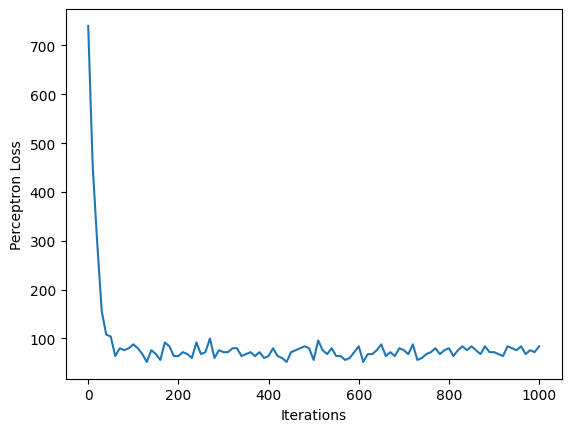

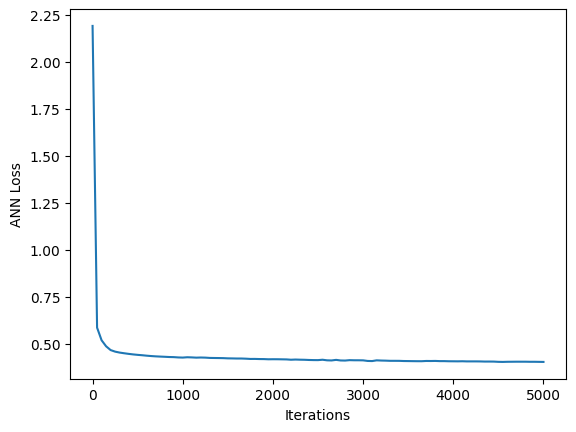

In [ ]:
f=plt.figure(1)
plt.plot(perceptron_iter,perceptron_loss)
plt.ylabel('Perceptron Loss')
plt.xlabel('Iterations')
g=plt.figure(2)
plt.plot(ann_iter,ann_loss)
plt.ylabel('ANN Loss')
plt.xlabel('Iterations')

# **_7. References_**

1.   https://www.geeksforgeeks.org/naive-bayes-classifiers/
2.   https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c
3.   https://cs229.stanford.edu/notes2020spring/cs229-notes-deep_learning.pdf
4.   https://www.vfast.org/journals/index.php/VTSE/article/view/511/pdf_25